In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as cr
from sklearn import tree

In [2]:
company_data = pd.read_csv("F:\\Excelr\\Assignment\\Using R\\Decision Tree\\Company_Data.csv")

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#create Separate dataframe 
x  =  company_data[['Sales','CompPrice','Income','Advertising','Population','Price',\
                       'Age','Education','Urban','US']]

In [5]:
x.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,Yes,Yes
1,11.22,111,48,16,260,83,65,10,Yes,Yes
2,10.06,113,35,10,269,80,59,12,Yes,Yes


In [6]:
# replace "Yes" With 1 and "No" with 0
x= x.replace({"Urban":{'Yes':1,'No':0},
              "US":{'Yes':1,'No':0}})
x[:2]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1


In [7]:
#Create Sales list from the sales column in dataframe
Sales = x['Sales'].tolist()

In [8]:
#Create a sales_list
#Convert Catogrical into Numeric
High = []
for each_value in Sales:
    high = 1 if each_value > 8 else 0
    High.append(high)

In [9]:
high = pd.DataFrame(High, columns=['high'])

In [10]:
x = x.drop('Sales', axis = 1)

In [11]:
print (x)

     CompPrice  Income  Advertising  Population  Price  Age  Education  Urban  \
0          138      73           11         276    120   42         17      1   
1          111      48           16         260     83   65         10      1   
2          113      35           10         269     80   59         12      1   
3          117     100            4         466     97   55         14      1   
4          141      64            3         340    128   38         13      1   
..         ...     ...          ...         ...    ...  ...        ...    ...   
395        138     108           17         203    128   33         14      1   
396        139      23            3          37    120   55         11      0   
397        162      26           12         368    159   40         18      1   
398        100      79            7         284     95   50         12      1   
399        134      37            0          27    120   49         16      1   

     US  
0     1  
1     1

In [12]:
y = high

In [13]:
print (type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
x_train,x_test, y_train ,y_test = train_test_split(x,y,random_state = 1, test_size = 0.3)
print(x_train.shape, y_train.shape)
print(y_test.shape, x_test.shape)

(280, 9) (280, 1)
(120, 1) (120, 9)


In [15]:
model = tree.DecisionTreeClassifier()
model1 = model.fit(x_train,y_train)

In [16]:
y_predict = model1.predict(x_test)
print(y_predict)

[0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 1 1]


In [17]:
acc1 = accuracy_score(y_test, y_predict)
print(acc1)

0.6583333333333333


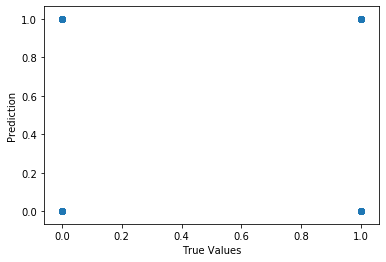

In [18]:
plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Prediction")
plt.show()

In [19]:
pd.DataFrame(cm(y_test,y_predict),
            columns=['Actual True','Actual False'],
            index = ['Predicted True','Predicted False'])

,Actual True,Actual False
Predicted True,57,13
Predicted False,28,22


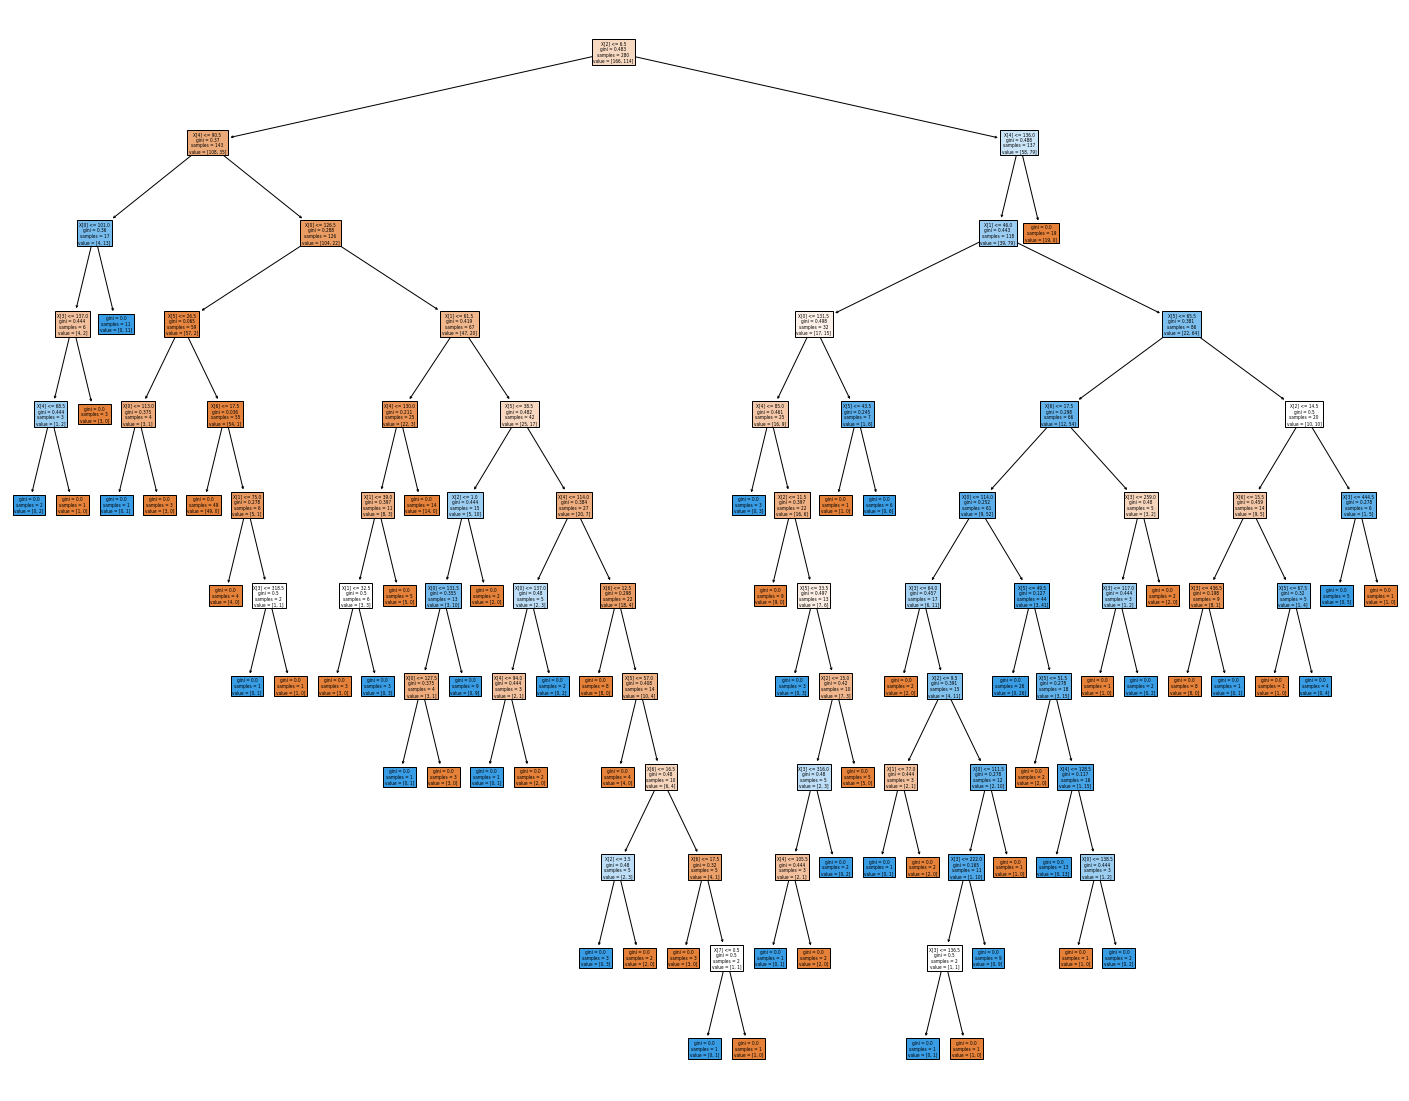

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True)

# random_forest

In [21]:
#feature_scaling
from sklearn.preprocessing import StandardScaler as sc

In [22]:
sc = sc()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor as RF

In [24]:
random_forest = RF(n_estimators = 20, random_state = 1)
random_forest.fit(x_train,y_train)

C:\Users\This\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=20, random_state=1)

In [25]:
y_pred = random_forest.predict(x_test)
print("y_pred\n",y_pred)

y_pred
 [0.25 0.45 0.05 0.45 0.65 0.75 0.   0.9  0.6  0.45 0.05 0.1  0.5  0.1
 0.25 0.6  0.65 0.8  0.   0.25 0.1  0.   0.55 0.25 0.7  0.4  0.15 0.2
 0.65 0.05 0.   0.2  0.3  0.85 0.05 0.9  0.4  0.05 0.15 0.95 0.25 0.75
 0.5  0.05 0.25 0.05 0.6  0.6  0.15 0.25 0.   0.8  0.3  0.85 0.55 0.7
 0.9  0.5  0.75 0.4  0.65 0.75 0.5  0.55 0.   0.25 0.2  0.2  0.85 0.15
 0.85 0.   0.75 0.65 0.25 0.3  0.45 0.1  0.05 0.2  0.25 0.15 0.85 0.7
 0.05 0.35 0.15 0.35 0.65 0.1  0.9  0.1  0.3  0.15 0.1  0.4  0.75 0.2
 0.85 0.3  0.4  0.35 0.05 0.1  0.2  0.6  0.8  0.8  0.25 0.1  0.45 0.75
 0.5  0.45 0.1  0.2  0.05 0.05 0.9  0.65]


In [26]:
from sklearn import metrics

In [27]:
print("mean absolutr error:", metrics.mean_absolute_error(y_test,y_pred))

mean absolutr error: 0.35624999999999996


In [28]:
print("mean squared error:", metrics.mean_squared_error(y_test,y_pred))

mean squared error: 0.19997916666666665


In [29]:
rmse = print("root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

root mean squared error: 0.44719030251858843


In [30]:
acc2 =accuracy_score(y_test,y_pred.round())
print(acc2)

0.675


# Xgboost

In [31]:
from xgboost import XGBClassifier

In [32]:
model1 = XGBClassifier()
model1.fit(x_train,y_train)

C:\Users\This\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(model1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [34]:
#make predictions for test data
y_pred = model1.predict(x_test)

In [35]:
predictions = [round(value) for value in y_pred]

In [36]:
#evaluate predictions
acc3 = accuracy_score(y_test,predictions)
print("accuracy: % 2f%%" % (acc3 * 100.0))

accuracy:  70.000000%


In [37]:
print("model1", acc1)
print("model2", acc2)
print("model3", acc3)

model1 0.6583333333333333
model2 0.675
model3 0.7
